## STATE EQUATION

For a system at thermodynamic equilibrium the thermodynamic variablres are constrained by a state equation.
$$f(P,V,T) = 0$$

For an ideal gas this is given by 
$$f(P,V,T) = PV - Nk_BT = 0$$

This is a surface in the PVT phase space, shown below.

In [1]:
#Module load
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [2]:
#Constants defenitions
kb = 1.38e-23  #Boltzmann constant (kg m^2 s^-2 K^-1)
R = 8.314      #Real gas constant (kg m^2 s^-2 K^-1 mol^-1)
na = 6.023e23  #Avagadro number (mol^-1)

#Unit conversions
Cal_J = 4.184  # 1cal to joule

In [3]:
#State function defenition
def returnTemp(P,V,N):
    return P*V/(R*N)

P = np.linspace(0,5,30)
V = np.linspace(0,5,30)
N = 4

X,Y = np.meshgrid(P,V)
Z = returnTemp(X,Y,N)

<IPython.core.display.Javascript object>


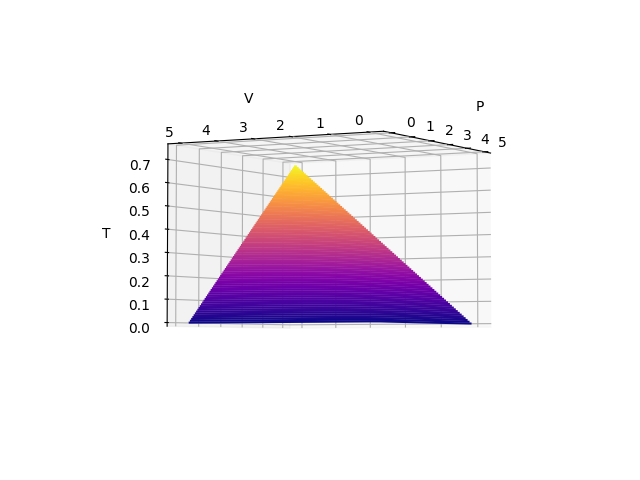

Text(0.5, 0, 'T')

In [4]:
#PLOT
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,Z,100,cmap='plasma')
ax.set_xlabel('P')
ax.set_ylabel('V')
ax.set_zlabel('T')

Each of the lines of the above graph represents an **isotherm**. The top view shows the familiar isotherm graph from the PV diagram. An ideal gas system will always lie on this surface in the PVT phase space.

So a reversible process can be thought of as a transformation represented by a path on this surface. Whereas in the case of an irreversible process, we observe the thransformation to leave the equation of state surface.

## BOOTSTRAPPING

Bootstrapping is the method of getting an estimate for unscertainity of a *statistic* from a data set by making measurements from multiple subsamples of the data set with replacement.

In [6]:
np.random.seed(4)     #Seed for reproducability
data = np.random.rand(1000)

The plots below shows the random numbers generated are actually random

<IPython.core.display.Javascript object>


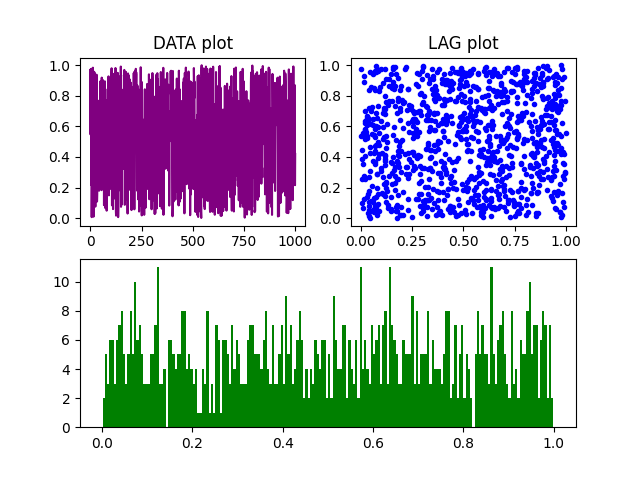

In [7]:
fig,axs = plt.subplots(2,2)
axs[0,0].set_title("DATA plot")
axs[0,0].plot(data,color='purple')
axs[0,1].set_title("LAG plot")
axs[0,1].plot(data[:-1],data[1:],'b.')
ax = plt.subplot(2,1,2)
dummy = ax.hist(data,bins=200,color="green")

In [8]:
print("MEAN    : ",np.mean(data))
print("MIN     : ",np.min(data))
print("MAX     : ",np.max(data))
print("STD DEV : ",np.std(data))
print("MEDIAN  : ",np.median(data))

MEAN    :  0.5077215282671004
MIN     :  0.0009066702152890072
MAX     :  0.9993640396351307
STD DEV :  0.29035228567977794
MEDIAN  :  0.518087520189029


In [9]:
def bootstrap(data,func,itern,sampleSize):
    """ Function to boostrap the data for itern subsamples with the finction func
        with a sample size given by sampleSize
    """
    boot_ans = []
    sample = np.empty((sampleSize,1))
    for i in range(itern):
        for i,n in enumerate(np.random.randint(low=0,high=len(data),size=sampleSize)):
            sample[i] = data[n]
        boot_ans.append(func(sample))
    return boot_ans

<IPython.core.display.Javascript object>


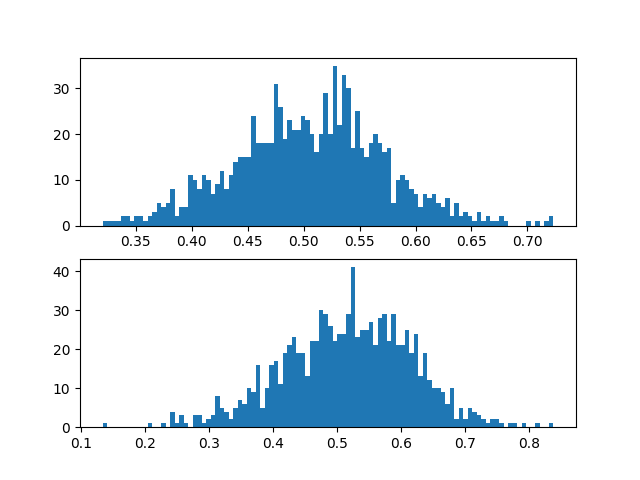

In [10]:
boot_mean = bootstrap(data,np.mean,1000,20)
boot_median = bootstrap(data,np.median,1000,20)
fig,axs = plt.subplots(2)
dummy = axs[0].hist(boot_mean,bins=100)
dummy = axs[1].hist(boot_median,bins=100)